<a href="https://colab.research.google.com/github/Emyfoton/MetodosI_EmilyCastillo_SebastianRodriguez/blob/main/Tarea_Derivadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2024-08-28 01:35:22--  https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EstrellaEspectro.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5356 (5.2K) [text/plain]
Saving to: ‘EstrellaEspectro.txt’

EstrellaEspectro.tx 100%[===================>]   5.23K  --.-KB/s    in 0s      

2024-08-28 01:35:22 (58.6 MB/s) - ‘EstrellaEspectro.txt’ saved [5356/5356]

            0         1
0    3.340000  1.007450
1    3.343838  1.019340
2    3.347677  1.036267
3    3.351515  1.017304
4    3.355353  1.004918
..        ...       ...
193  4.080808  1.337742
194  4.084646  1.169107
195  4.088485  1.021024
196  4.092323  0.964833
197  4.096162  1.009015

[198 rows x 2 columns]
(array([  2,   5,   8,  11,  14,  17,  20,  23,  26,  2

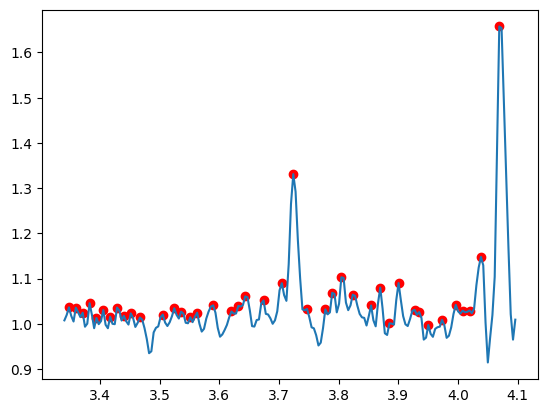

In [ ]:
# Máximos

!wget -O EstrellaEspectro.txt 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EstrellaEspectro.txt'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

df = pd.read_csv('EstrellaEspectro.txt', sep='\s+', header=None)

x=df.iloc[:,0]
y=df.iloc[:,1]
print(df)

maximos_locales=find_peaks(y)
indices=maximos_locales[0]

print(maximos_locales)
print(x[indices])
print(y[indices])

plt.plot(x,y)
plt.scatter(x[indices],y[indices], color="r")
plt.show()


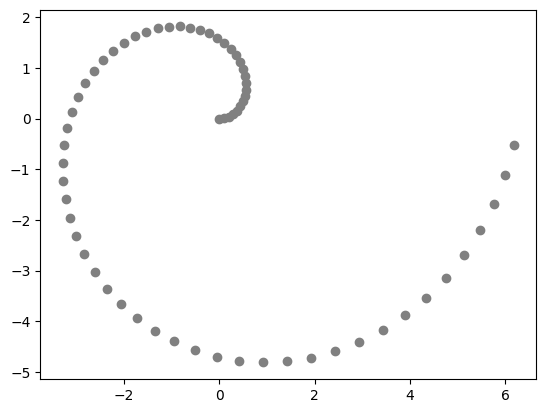

In [ ]:
# Espiral de Arquímedes
import numpy as np
import matplotlib.pyplot as plt

theta=0
a=0
b=1
h=0.1

def espiral(theta,a,b,h):
  r=np.zeros(int(2*np.pi/h)+1)
  for i in range(int((2*np.pi)/h)+1):
    r[i]=a+b*(theta)
    theta+=h
  return r

y=espiral(theta, a, b, h)*np.sin(np.arange(0,2*np.pi,h))
x=espiral(theta, a, b, h)*np.cos(np.arange(0,2*np.pi,h))
plt.scatter(x,y,color="grey")
plt.show()



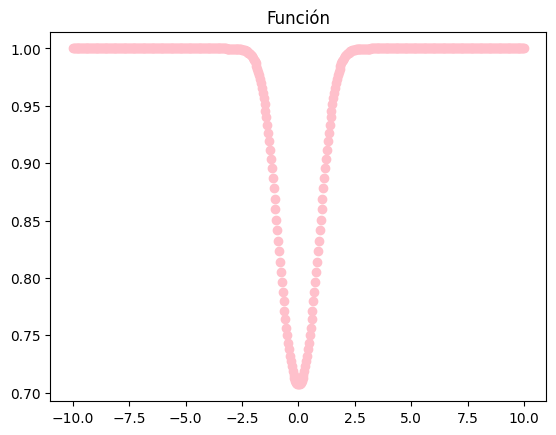

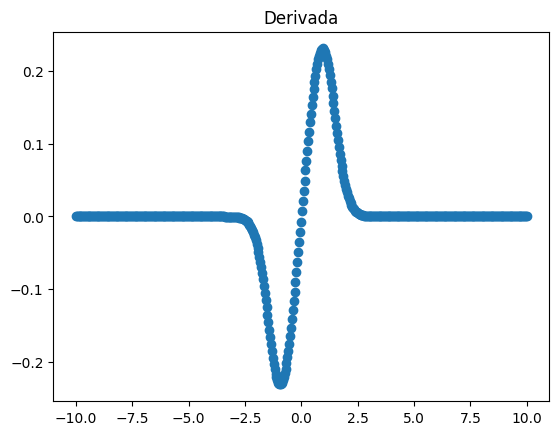

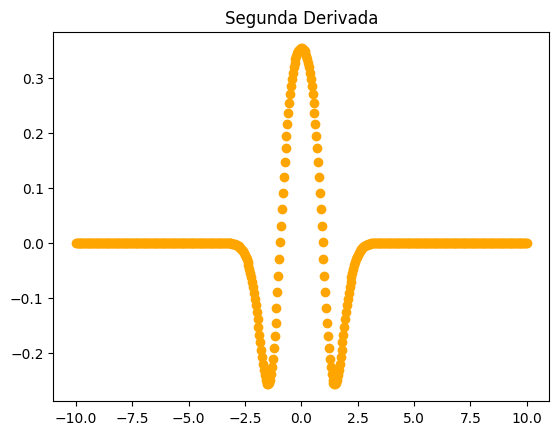

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

def f(x):
  return 1/(np.sqrt(1+np.e**(-x**2)))

x = np.linspace(-10, 10, 500)
y = f(x)

plt.scatter(x,y, color="pink")
plt.title("Función")
plt.show()

def CentralDerivative(f,x,h=0.05):
  d = 0.
  if h!= 0:
    d = (f(x+h) - f(x-h))/(2*h)
  return d

y=CentralDerivative(f,x,h=0.05)
x=np.linspace(-10, 10, 500)
plt.scatter(x,y)
plt.title("Derivada")
plt.show()

def S_CentralDerivate(f,x,h=0.05):
  d = 0.
  if h!= 0:
    d = (f(x+2*h) - 2*f(x) + f(x-2*h))/(4*h**2)
  return d

x=np.linspace(-10, 10, 500)
y=S_CentralDerivate(f,x,h=0.05)
plt.scatter(x,y, color= "orange")
plt.title("Segunda Derivada")
plt.show()

x_1_excato=np.array([-0.94])
x_2_excato=np.array([0.94])
y_1_excato=np.array([-0.23])
y_2_excato=np.array([0.23])

y_1=np.max(CentralDerivative(f,x,h=0.05))
y_2=np.min(CentralDerivative(f,x,h=0.05))
i_min=np.argmin(CentralDerivative(f,x,h=0.05))
i_max=np.argmax(CentralDerivative(f,x,h=0.05))
x_1=x[i_min]
x_2=x[i_max]

diff_y1 = abs(y_1 - y_1_excato)
diff_x1 = abs(x_1 - x_1_excato)
diff_y2 = abs(y_2 - y_2_excato)
diff_x2 = abs(x_2 - x_2_excato)


<ipython-input-16-fd685ad7e867>:11: RuntimeWarning: divide by zero encountered in divide
  campo= V*((1-R**2)/(X**2+Y**2))
<ipython-input-16-fd685ad7e867>:12: RuntimeWarning: divide by zero encountered in divide
  Vx = V*(1/(np.sqrt(1+X**2/Y**2)))
<ipython-input-16-fd685ad7e867>:12: RuntimeWarning: invalid value encountered in divide
  Vx = V*(1/(np.sqrt(1+X**2/Y**2)))


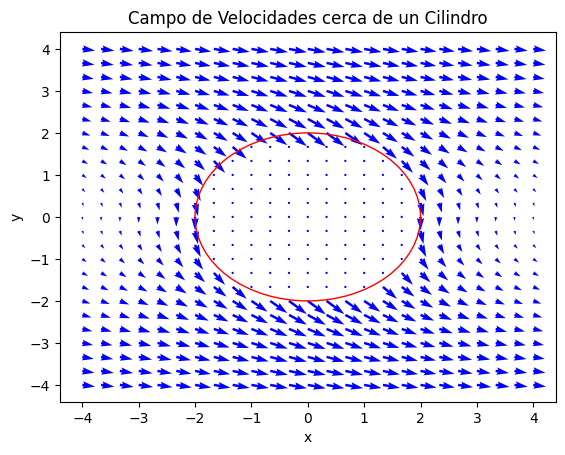

In [ ]:
# Campo de velocidades
import numpy as np
import matplotlib.pyplot as plt

def campo_velocidades (R,V):

  x= np.linspace(-4, 4, 25)
  y= np.linspace(-4, 4, 25)
  X, Y = np.meshgrid(x, y)

  campo= V*((1-R**2)/(X**2+Y**2))
  Vx = V*(1/(np.sqrt(1+X**2/Y**2)))

  dentro_cilindro= (X**2+Y**2< R**2)

  Vdex = np.zeros_like(X)
  Vdey = np.zeros_like(Y)
  for i in range (X.shape[0]):
    for j in range (X.shape[1]):
      Vdex[X**2+Y**2< R**2] = 0
      Vdey[X**2+Y**2< R**2] = 0
      Vdex[i,j] = Vx[i,j]
      Vdey[i,j] = campo[i,j]

  return X, Y, Vdex, Vdey

X, Y, Vdex, Vdey = campo_velocidades(R=2,V=2)

plt.figure()
plt.quiver(X, Y, Vdex, Vdey, color= "b",  width=0.005)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo de Velocidades cerca de un Cilindro')

c=plt.Circle((0,0), R, color= "red", fill= False)
plt.gca().add_patch(c)
plt.show()